# **Stage 2 - Data Processing**

Kelompok 8B Srikandi

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
pip install scikit-learn imbalanced-learn

In [ ]:
df = pd.read_csv("E_Commerce_Dataset.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Dari output diatas dapat dilihat jika tipe data yang digunakan unutk masing - masing feature sudah sesuai

# **1. Data Cleansing**

Melakukan pembersihan data dengan cara:<br>
A. Handle missing values<br>
B. Handle duplicated data<br>
C. Handle outliers<br>
D. Feature transformation<br>
E. Feature encoding<br>
F. Handle class imbalance<br>



## A. Handle missing values

In [ ]:
# Melakukan pengecekan apakah terdapat data kosong di dalam dataset
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

Berdasarkan output diatas ditemukan data kosong (null) pada kolom Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [ ]:
# Menghitung median dari setiap kolom
median_values = df.median(numeric_only=True)

# Mengganti nilai-nilai yang hilang dengan median dari masing-masing kolom
df.fillna(median_values, inplace=True)

In [ ]:
#melakukan pemerksaan apakah terdapat kolom yang masih kosong
kolom_kosong = df.columns[df.isna().any()].tolist()
kolom_kosong

[]

Setelah melakukan handling missing value lalu dilakukan pengecekan sudah tidak terdapat data yang kosong lagi, karena semua data yang kosong telah diisi menggunakan nilai median.

## B. Handle duplicated data

In [ ]:
#melakukan pemeriksaan apabila terdapat data yang duplicate secara keseluruhan
df.duplicated().sum()

0

Dari hasil pengecekan tidak ditemukan data yang duplikat sehingga kita tidak perlu melakukan handling duplicated data

## C. Handling Outlier

### Sebelum Handling Outlier

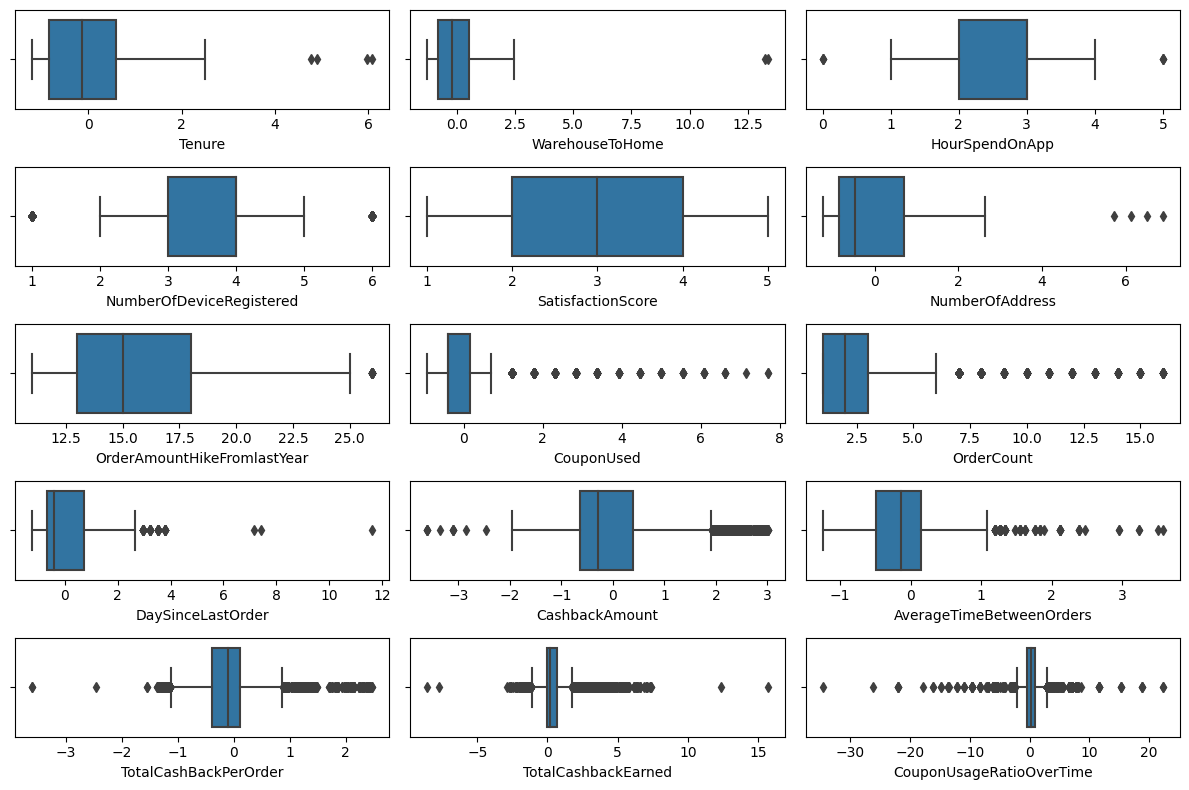

In [ ]:
# Kolom yang ingin dikecualikan dari plot
excluded_columns = ['CustomerID', 'Churn', 'CityTier', 'Complain']

# Mengidentifikasi kolom numerik
numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']).columns if col not in excluded_columns]

# Membuat subplot dalam satu gambar dengan 4 kolom dan 3 baris
fig, axes = plt.subplots(5, 3, figsize=(12, 8))

# Loop melalui kolom yang bertipe numerik
for i, column in enumerate(numeric_columns):
    row = i // 3
    col = i % 3



    # Membuat boxplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])

# Mengatur layout
plt.tight_layout()
plt.show()


### Handling Using IQR

In [ ]:
# Tentukan kolom yang ingin dihitung IQR-nya
columns_to_calculate_IQR = ['Tenure', 'NumberOfAddress', 'WarehouseToHome', 'CashbackAmount']

for column in columns_to_calculate_IQR:
    # Tentukan batas atas dan batas bawah untuk outlier
    lower_bound = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
    upper_bound = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))

    # Filter data yang termasuk dalam outlier
    iqr_filtered = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Hitung IQR hanya untuk data yang termasuk dalam outlier
    Q1 = iqr_filtered[column].quantile(0.25)
    Q3 = iqr_filtered[column].quantile(0.75)
    IQR = Q3 - Q1

    # Lakukan sesuatu dengan IQR, misalnya mencetaknya
    print(f'{column} IQR for included data: {IQR}')

Tenure IQR for included data: 9.5
NumberOfAddress IQR for included data: 1.5
WarehouseToHome IQR for included data: 0.5
CashbackAmount IQR for included data: 24.0


### Sesudah Handling Outlier

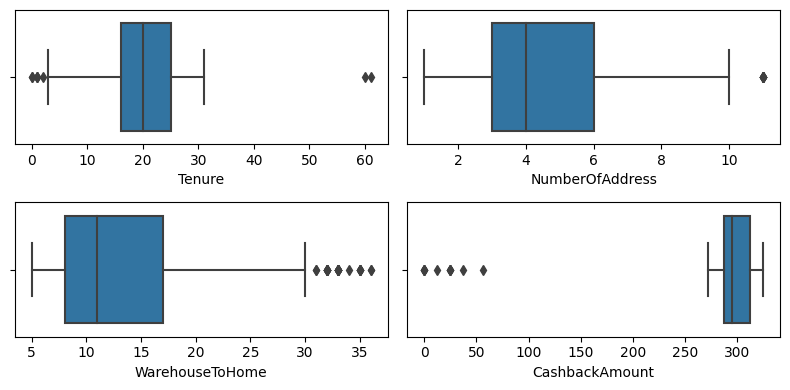

In [ ]:
# Membuat subplot dalam satu gambar dengan 2 kolom dan 2 baris
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# Loop melalui kolom yang ingin dihitung IQR-nya
for i, column in enumerate(columns_to_calculate_IQR):
    row = i // 2
    col = i % 2

    # Membuat boxplot hanya untuk data yang tidak termasuk dalam outlier
    sns.boxplot(data=iqr_filtered, x=column, ax=axes[row, col])

# Mengatur layout
plt.tight_layout()
plt.show()


**Penjelasan:**

Dari tampilan output setelah melakukan handling outlier memang tidak menampilkan perubahan yang mencolok. karena, kami hanya melakukan Handling Outlier untuk beberapa kolom yang bertipe  numerik('Tenure', 'NumberOfAddress','WarehouseToHome') karena beberapa alasan berikut:
- Kami memiliki beberapa feature yang bertipe numerik namun bersifat kategorikal(CityTier, HourSpendOnApp, NumberOfDeviceRegistered,SatisfactionScore, Complain )
- Dari data yang kami miliki range untuk masing-masing data tidak terlalu jauh sehingga kami memutuskan untuk tidak menghapus outlier secara keseluruhan pada feature-feature dalam dataset.
- Beberapa outlier tidak berbenturan dengan batasan masalah oleh karena itu kami rasa jika kami menghapus outlier tersebut justru akan membuang banyak informasi.
- contohnya pada kolom OrderCount terdapat outlier pada kolom tersebut.namun jika kita melihat OrderCount yang begitu besar dari beberapa customer justru hal tersebut merupakan hal yang baik bagi e-commerce menandakan customer percaya untuk berbelanja di e-commerce tersebut dan peluang untuk customer retain pun lebih besar

## D. Feature transformation

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.217940
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.193878
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


Berikut merupakan tampilan describe dari dataset

standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Kolom-kolom yang ingin di-standarisasi
columns_to_standardize = ['Tenure', 'NumberOfAddress', 'WarehouseToHome', 'CashbackAmount', 'DaySinceLastOrder', 'CouponUsed']

# Kolom-kolom yang ingin dikecualikan dari standarisasi
columns_to_exclude = ['Churn', 'CityTier', 'HourSpendOnApp',	'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
                      'OrderAmountHikeFromlastYear', 'OrderCount']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi hanya pada kolom-kolom yang ingin di-standarisasi
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Kolom-kolom yang ingin dikecualikan tetap tidak terpengaruh
df[columns_to_exclude] = df[columns_to_exclude]


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5.630000e+03,5630.000000,5.630000e+03,5630.000000,5630.000000,5630.000000,5.630000e+03,5630.000000,5630.000000,5.630000e+03,5630.000000,5.630000e+03,5.630000e+03
mean,52815.500000,0.168384,9.339283e-17,1.654707,2.524131e-17,2.934636,3.688988,3.066785,2.019304e-17,0.284902,15.674600,-6.057913e-17,2.961812,-1.009652e-16,1.817374e-16
std,1625.385339,0.374240,1.000089e+00,0.915389,1.000089e+00,0.705528,1.023999,1.380194,1.000089e+00,0.451408,3.591058,1.000089e+00,2.879248,1.000089e+00,1.000089e+00
min,50001.000000,0.000000,-1.212618e+00,1.000000,-1.266208e+00,0.000000,1.000000,1.000000,-1.244130e+00,0.000000,11.000000,-9.243054e-01,1.000000,-1.249003e+00,-3.602759e+00
25%,51408.250000,0.000000,-8.536466e-01,1.000000,-7.868918e-01,2.000000,3.000000,2.000000,-8.570371e-01,0.000000,13.000000,-3.859400e-01,1.000000,-6.888271e-01,-6.346463e-01
50%,52815.500000,0.000000,-1.357036e-01,1.000000,-1.877464e-01,3.000000,4.000000,3.000000,-4.699437e-01,0.000000,15.000000,-3.859400e-01,2.000000,-4.087392e-01,-2.890441e-01
75%,54222.750000,0.000000,5.822395e-01,3.000000,5.312280e-01,3.000000,4.000000,4.000000,6.913364e-01,1.000000,18.000000,1.524253e-01,3.000000,7.116122e-01,3.818306e-01
max,55630.000000,1.000000,6.086470e+00,3.000000,1.335294e+01,5.000000,6.000000,5.000000,6.884830e+00,1.000000,26.000000,7.689540e+00,16.000000,1.163504e+01,3.004341e+00


Penjelasan:
- kami hanya melakukan standarization untuk feature-feature tertentu saja yang memiliki skala yang berbeda atau rentang nilai yang signifikan.
- kami ingin menjaga interpretasi asli dari data dalam beberapa kolom tertentu. karena, standarisasi mungkin tidak diperlukan dan dapat menghilangkan informasi yang berguna.

## E. Feature Encoding

In [ ]:
mapping_PreferredLoginDevice = pd.get_dummies(df['PreferredLoginDevice'], drop_first=True)
mapping_PreferredLoginDevice.head()


,Mobile Phone,Phone
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
mapping_PreferredPaymentMode =  pd.get_dummies(df['PreferredPaymentMode'], drop_first=True)
mapping_PreferredPaymentMode.head()

,COD,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [ ]:
mapping_Gender =  pd.get_dummies(df['Gender'], drop_first=True)
mapping_Gender.head()

,Male
0,0
1,1
2,1
3,1
4,1


In [ ]:
mapping_PreferedOrderCat = pd.get_dummies(df['PreferedOrderCat'], drop_first=True)
mapping_PreferedOrderCat.head()

,Grocery,Laptop & Accessory,Mobile,Mobile Phone,Others
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
mapping_MaritalStatus =  pd.get_dummies(df['MaritalStatus'], drop_first=True)
mapping_MaritalStatus.head()

,Married,Single
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## F. Handle class imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Menangani ketimpangan kelas (class imbalance)
target_column = 'Churn'
class_distribution_before = Counter(df[target_column])
print("Class distribution before RandomOverSampler:", class_distribution_before)
x = df[[col for col in df.columns if col not in target_column]]
y = df[target_column]

Class distribution before RandomOverSampler: Counter({0: 4682, 1: 948})


In [ ]:

print(x.shape)
print(y.shape)

(5630, 19)
(5630,)


In [ ]:
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
x_over, y_over = ros.fit_resample(x, y)

print(pd.Series(y_over).value_counts())

0    4682
1    2341
Name: Churn, dtype: int64


Dari Output diatas dapat dilihat perbedaan dengan data sebelumnya. karena, kelas menjadi seimbang melalui duplikat(oversampling, tengah)

# **2. Feature Engineering**

## A. Feature selection (membuang feature yang kurang relevan atau redundan)

- Karna ada 2 kolom yakni kolom CouponUsed dan kolom OrderCount yang mempunyai korelasi mencapai 0.75 yang menunjukkan ada redudansi dalam data, maka kami memutuskan untuk melakukan uji t-test dua sampel  untuk kolom "CouponUsed" dan "OrderCount" berdasarkan kategori "Churn" dan mencetak hasil uji statistik, termasuk t-statistik dan p-value, untuk kedua kolom. Kemudian, hasil uji t-test masing-masing kolom dinilai apakah perbedaan antara sampel-sampel tersebut signifikan atau tidak berdasarkan ambang batas signifikansi (alpha).

In [ ]:
from scipy import stats
import pandas as pd

data = pd.read_csv('E_Commerce_Dataset.csv')

# Periksa jumlah nilai yang hilang dalam kolom 'CouponUsed' dan 'OrderCount'
print("Missing values in CouponUsed:", df['CouponUsed'].isnull().sum())
print("Missing values in OrderCount:", df['OrderCount'].isnull().sum())

# Drop baris dengan nilai yang hilang
df = df.dropna(subset=['CouponUsed', 'OrderCount'])

# Uji t-test setelah menangani nilai yang hilang
churn_yes = df[df['Churn'] == 1]
churn_no = df[df['Churn'] == 0]

t_stat_coupon, p_value_coupon = stats.ttest_ind(churn_yes['CouponUsed'], churn_no['CouponUsed'])
t_stat_order, p_value_order = stats.ttest_ind(churn_yes['OrderCount'], churn_no['OrderCount'])

# Output
print("T-statistic for CouponUsed:", t_stat_coupon)
print("P-value for CouponUsed:", p_value_coupon)

print("T-statistic for OrderCount:", t_stat_order)
print("P-value for OrderCount:", p_value_order)

# Ambang batas signifikansi (biasanya 0.05)
alpha = 0.05

# Print hasil
if p_value_coupon < alpha:
    print("Ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel CouponUsed adalah signifikan.")
else:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel CouponUsed mungkin tidak signifikan.")

if p_value_order < alpha:
    print("Ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel OrderCount adalah signifikan.")
else:
    print("Tidak ada bukti yang cukup untuk menolak hipotesis nol.")
    print("Perbedaan antara dua sampel OrderCount mungkin tidak signifikan.")


Missing values in CouponUsed: 0
Missing values in OrderCount: 0
T-statistic for CouponUsed: -0.10728700657961825
P-value for CouponUsed: 0.9145651164356323
T-statistic for OrderCount: -1.8038164126256266
P-value for OrderCount: 0.0713135428658475
Tidak ada bukti yang cukup untuk menolak hipotesis nol.
Perbedaan antara dua sampel CouponUsed mungkin tidak signifikan.
Tidak ada bukti yang cukup untuk menolak hipotesis nol.
Perbedaan antara dua sampel OrderCount mungkin tidak signifikan.


- Berdasarkan analisis kami, terdapat korelasi positif yang kuat sebesar 0.75 antara kolom "CouponUsed" dan "OrderCount." Namun, ketika kami melakukan uji t-test 2 sampel, kami menemukan bahwa T-statistik untuk "CouponUsed" dan "OrderCount" adalah "nan," yang mengindikasikan bahwa data mungkin tidak cocok untuk analisis ini.
Hasil uji menunjukkan bahwa tidak ada bukti yang cukup untuk menolak hipotesis nol. Oleh karena itu, kami tidak memiliki dasar yang cukup untuk menyimpulkan bahwa perbedaan antara dua sampel "CouponUsed" atau "OrderCount" adalah signifikan.
Berdasarkan temuan ini, kami telah memutuskan untuk **tidak menghapus kedua kolom tersebut dari dataset kami**.
- **“Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan"**






## B. Feature extraction (membuat feature baru dari feature yang sudah ada)


In [ ]:

#  fitur "Average Time between Orders" dari kolom DaysSinceLastOrder/OrderCount  korelasi 0.5
df['AverageTimeBetweenOrders'] = df['DaySinceLastOrder'] / df['OrderCount']

#  fitur "Total Cash Back per Order" dari kolom (CashbackAmount/OrderCount) korelasi 0.36
df['TotalCashBackPerOrder'] = df['CashbackAmount'] / df['OrderCount']

# fitur TotalCashbackEarned dari kolom (CashbackAmount*Tenure) korelasi 0.48
df['TotalCashbackEarned'] = df['CashbackAmount'] * df['Tenure']

# fitur Coupon Usage Ratio Over Time dari kolom (CouponUsed/DaysSinceLastOrder) korelasi 0.36
df['CouponUsageRatioOverTime'] = df['CouponUsed'] / df['DaySinceLastOrder']


print(df)


      CustomerID  Churn    Tenure PreferredLoginDevice  CityTier  \
0          50001      1 -0.733989         Mobile Phone         3   
1          50002      1 -0.135704                Phone         1   
2          50003      1 -0.135704                Phone         1   
3          50004      1 -1.212618                Phone         3   
4          50005      1 -1.212618                Phone         1   
...          ...    ...       ...                  ...       ...   
5625       55626      0 -0.016046             Computer         1   
5626       55627      0  0.342925         Mobile Phone         1   
5627       55628      0 -1.092961         Mobile Phone         1   
5628       55629      0  1.539497             Computer         3   
5629       55630      0 -0.255361         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0           -1.146379           Debit Card  Female             3.0   
1           -0.906721                  UPI 

In [ ]:
df.sample(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AverageTimeBetweenOrders,TotalCashBackPerOrder,TotalCashbackEarned,CouponUsageRatioOverTime
193,50194,0,-1.212618,Phone,1,-0.187746,Debit Card,Female,2.0,3,...,1,12.0,-0.924305,1.0,-0.688827,-1.061567,-0.688827,-1.061567,1.287275,1.341854
4793,54794,0,-0.016046,Phone,2,-0.067917,Debit Card,Male,4.0,5,...,0,22.0,-0.385940,2.0,-0.128651,-0.593987,-0.064326,-0.296994,0.009531,2.999891
208,50209,0,0.701897,Mobile Phone,1,-0.307575,Debit Card,Female,2.0,3,...,0,16.0,-0.385940,1.0,-1.249003,0.463149,-1.249003,0.463149,0.325083,0.308999
1546,51547,0,1.419840,Computer,1,1.010544,Debit Card,Male,3.0,3,...,1,15.0,-0.924305,1.0,0.711612,-0.187396,0.711612,-0.187396,-0.266073,-1.298889
5493,55494,1,-0.016046,Mobile Phone,3,0.171741,Debit Card,Female,4.0,4,...,0,22.0,0.152425,2.0,0.991700,0.422490,0.495850,0.211245,-0.006779,0.153701
665,50666,0,-0.494675,Mobile Phone,1,-0.547234,Debit Card,Male,2.0,4,...,0,15.0,-0.924305,1.0,-0.688827,-0.126408,-0.688827,-0.126408,0.062531,1.341854
528,50529,0,1.539497,Computer,1,-0.906721,Debit Card,Male,3.0,3,...,0,11.0,-0.385940,14.0,0.711612,2.069182,0.050829,0.147799,3.185500,-0.542346
3890,53891,0,0.941211,Mobile Phone,2,-1.026550,Debit Card,Female,3.0,4,...,1,19.0,0.690791,3.0,-0.408739,-0.411021,-0.136246,-0.137007,-0.386858,-1.690052
1221,51222,0,0.941211,Mobile Phone,1,1.849348,Debit Card,Female,3.0,4,...,0,13.0,-0.924305,3.0,0.991700,-0.370362,0.330567,-0.123454,-0.348589,-0.932041
4407,54408,0,-0.255361,Mobile Phone,1,-0.786892,Debit Card,Male,3.0,5,...,0,14.0,-0.385940,6.0,1.551876,0.158206,0.258646,0.026368,-0.040400,-0.248693


**Kami menambahkan 4 feature baru dari feature yang sudah ada antara lain:**
 - 1. Feature Average Time between Orders (DaysSinceLastOrder/OrderCount) korelasi 0.5<br>
Fitur baru ini mengukur rata-rata berapa lama waktu yang berlalu antara pesanan
yang dilakukan oleh pelanggan. Jika waktu antara pesanan-pesanan pelanggan lebih
pendek, nilai fitur ini akan lebih kecil, dan jika waktu antara pesanan lebih lama,
nilai fitur ini akan lebih besar. Ini bisa memberikan wawasan tentang perilaku pesanan pelanggan.
Semakin sering mereka melakukan pesanan, semakin rendah rata-rata waktu antara pesanan.

- 2. Feature Total Cashback Earned (CashbackAmount*Tenure) korelasi 0.48<br>
Dengan fitur ini, dapat melacak sejauh mana pelanggan telah
menerima cashback selama berlangganan mereka. Ini dapat memberikan
wawasan tentang manfaat yang diterima oleh pelanggan selama berlangganan
mereka dan sejauh mana lamanya berlangganan berdampak pada jumlah cashback
yang diterima.

- 3. Total Cash Back per Order (CashbackAmount/OrderCount) korelasi 0.36<br>
Dengan fitur ini, dapat melihat sejauh mana pelanggan mendapatkan cashback
per pesanan yang mereka lakukan. Semakin besar nilai fitur ini, semakin besar
rata-rata cashback yang diterima pelanggan per pesanan. Ini dapat memberikan pemahaman
tentang bagaimana pesanan pelanggan berhubungan dengan jumlah cashback yang mereka terima.

- 4. Coupon Usage Ratio Over Time (CouponUsed/DaysSinceLastOrder) korelasi 0.36<br>
Dengan fitur ini, dapat melihat sejauh mana pelanggan menggunakan kupon dalam
jangka waktu tertentu setelah pesanan terakhir mereka. Semakin besar nilai fitur ini,
semakin banyak kupon yang digunakan oleh pelanggan dalam waktu singkat setelah pesanan
terakhir mereka. Ini dapat memberikan pemahaman tentang kebiasaan penggunaan kupon pelanggan
dalam konteks waktu.

**4 feature tambahan** <br>
1. Total Harga: fitur baru yang merupakan perkalian antara harga produk dan jumlah produk yang dibeli. Ini akan memberikan informasi tentang total biaya belanjaan untuk setiap transaksi.

2. Durasi Pengiriman: Jika dataset Anda mencakup informasi waktu pesanan dan waktu pengiriman, dapat membuat fitur yang menghitung berapa lama waktu yang dibutuhkan untuk mengirim pesanan dari waktu pemesanan hingga waktu pengiriman.

3. Kategori Produk Terlaris: dapat membuat fitur yang mengidentifikasi kategori produk yang paling sering dibeli oleh pelanggan.

4. Review Score Rata-rata: Jika dataset mencakup data ulasan produk, dapat membuat fitur yang menghitung rata-rata skor ulasan produk untuk setiap transaksi.